<a href="https://colab.research.google.com/github/poronita/Melanoma-Detection-using-Custom-CNN-in-TensorFlow/blob/main/Melanoma_Detection_using_Custom_CNN_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# **Importing Skin Cancer Data**

***Data* *Reading /Data Understanding***

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Define the paths to your train and test directories
base_dir = '/content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'

In [11]:
!ls "{base_dir}"

Test  Train


In [12]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
train_dir = "/content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

In [13]:
!ls "{train_dir}"
!ls "{test_dir}"


'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'
'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'


In [10]:
# Check the number of images in each directory for understanding
num_train_images = sum([len(files) for r, d, files in os.walk(train_dir)])
num_test_images = sum([len(files) for r, d, files in os.walk(test_dir)])
print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")

Number of training images: 2239
Number of testing images: 118


# **Load using keras.preprocessing**

***Dataset Creation***

*Create the datasets with resizing and batch processing:*

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Including a 20% validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


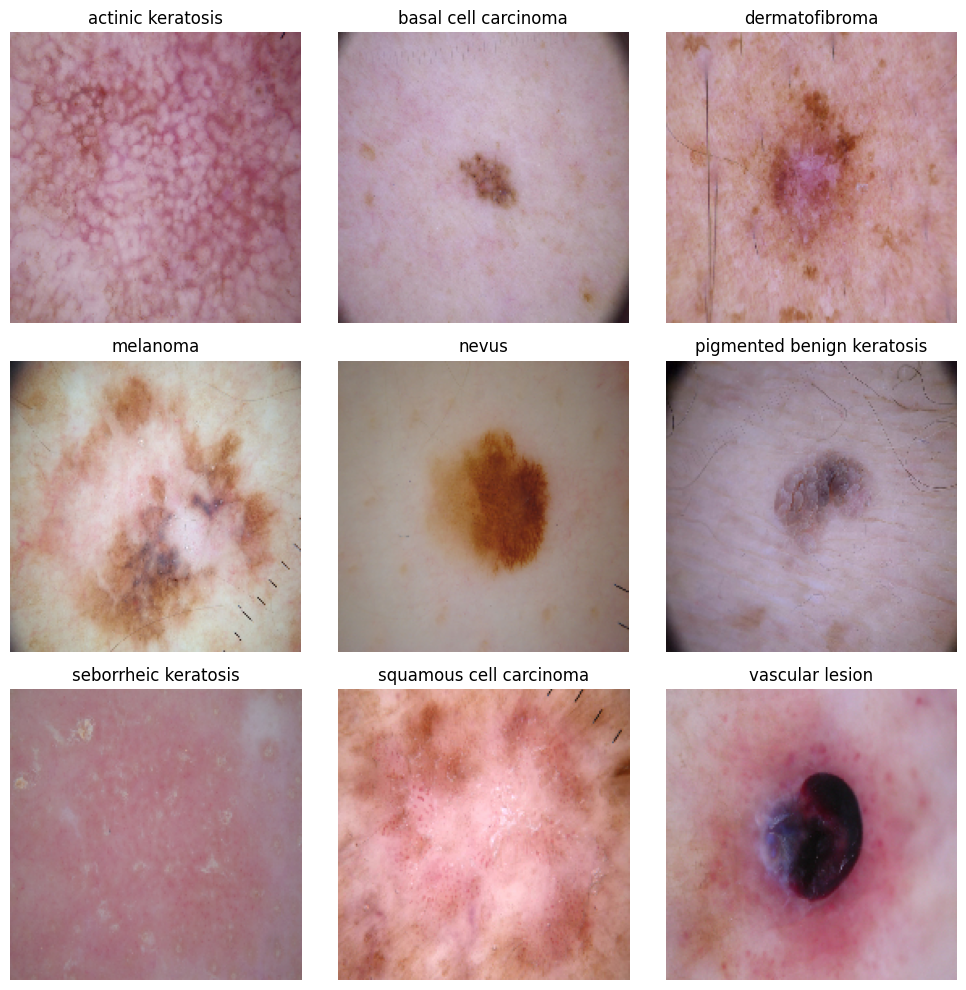

In [15]:
import matplotlib.pyplot as plt

def plot_images_of_each_class(generator):
    class_indices = {v: k for k, v in generator.class_indices.items()}
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for idx in range(9):
        for x, y in generator:
            for i in range(x.shape[0]):
                if y[i].argmax() == idx:
                    axes[idx].imshow(x[i])
                    axes[idx].set_title(class_indices[idx])
                    axes[idx].axis('off')
                    break
            else:
                continue
            break
    plt.tight_layout()
    plt.show()

plot_images_of_each_class(train_generator)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')  # Assuming 9 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20
57/57 [==============================] - 401s 7s/step - loss: 2.2146 - accuracy: 0.2384 - val_loss: 1.9688 - val_accuracy: 0.3739
Epoch 2/20
57/57 [==============================] - 184s 3s/step - loss: 1.7671 - accuracy: 0.3749 - val_loss: 1.8159 - val_accuracy: 0.3176
Epoch 3/20
57/57 [==============================] - 192s 3s/step - loss: 1.4653 - accuracy: 0.4908 - val_loss: 1.8441 - val_accuracy: 0.3423
Epoch 4/20
57/57 [==============================] - 199s 3s/step - loss: 1.4378 - accuracy: 0.4880 - val_loss: 1.6092 - val_accuracy: 0.4550
Epoch 5/20
57/57 [==============================] - 191s 3s/step - loss: 1.3176 - accuracy: 0.5471 - val_loss: 1.7202 - val_accuracy: 0.4302
Epoch 6/20
57/57 [==============================] - 190s 3s/step - loss: 1.2010 - accuracy: 0.5816 - val_loss: 1.6807 - val_accuracy: 0.4887
Epoch 7/20
57/57 [==============================] - 191s 3s/step - loss: 1.1860 - accuracy: 0.5833 - val_loss: 1.6057 - val_accuracy: 0.4550
Epoch 8/20
57

In [17]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

# Recreate train and validation generators using train_datagen_augmented


In [18]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [ ]:
# Assuming you have at least one image in train_dir
train_images = pathlib.Path(train_dir).glob('*/images/*.jpg')
sample_image_path = next(train_images)  # Grab a single image path

# Load the image
img = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expand dimensions to fit the datagen requirements
img_array = np.expand_dims(img_array, axis=0)

# Use the datagen variable according to the strategy you're testing
datagen = augmented_datagen  # or simplified_datagen for underfitting

plt.figure(figsize=(10, 10))
plt.suptitle("Data Augmentation Effects")

for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    plt.axis('off')
    if i == 8:
        break

plt.show()


In [23]:
# Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Adding validation split for augmented data


In [24]:
# For validation data, we'll rescale the images similarly but won't apply the other augmentations
validation_datagen = ImageDataGenerator(
    rescale=1./255)  # Only rescaling for validation data

In [25]:
# Setting up the validation data generator using test_dir
validation_generator = validation_datagen.flow_from_directory(
    test_dir,  # Correctly using test_dir for validation
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Note: We don't use subset='validation' here because we're not splitting the test data further


Found 118 images belonging to 9 classes.


In [27]:
!pip install keras

In [30]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [31]:
# Building the Enhanced Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')  # Assuming 9 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Enhanced Model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/20
57/57 [==============================] - 231s 4s/step - loss: 8.3107 - accuracy: 0.3198 - val_loss: 5.1434 - val_accuracy: 0.1356
Epoch 2/20
57/57 [==============================] - 197s 3s/step - loss: 5.6873 - accuracy: 0.3582 - val_loss: 7.3035 - val_accuracy: 0.1356
Epoch 3/20
57/57 [==============================] - 195s 3s/step - loss: 3.8535 - accuracy: 0.3905 - val_loss: 11.2068 - val_accuracy: 0.1356
Epoch 4/20
57/57 [==============================] - 192s 3s/step - loss: 3.3508 - accuracy: 0.4111 - val_loss: 15.5855 - val_accuracy: 0.1356
Epoch 5/20
57/57 [==============================] - 191s 3s/step - loss: 2.5298 - accuracy: 0.4529 - val_loss: 5.3093 - val_accuracy: 0.1610
Epoch 6/20
57/57 [==============================] - 192s 3s/step - loss: 1.8673 - accuracy: 0.4830 - val_loss: 4.2079 - val_accuracy: 0.1695
Epoch 7/20
57/57 [==============================] - 194s 3s/step - loss: 1.6564 - accuracy: 0.4925 - val_loss: 3.8954 - val_accuracy: 0.1610
Epoch 8/20


In [ ]:
# For the model designed to combat overfitting
model_overfitting.summary()

# For the model designed to combat underfitting
model_underfitting.summary()


In [ ]:
# Visualizing Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)



In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# train_generator is properly defined and points to your dataset
class_counts = np.zeros(len(train_generator.class_indices))

for _, labels in train_generator:
    class_counts += np.sum(labels, axis=0)
    if np.sum(class_counts) >= len(train_generator.filenames):
        break

class_labels = list(train_generator.class_indices.keys())
class_distribution = dict(zip(class_labels, class_counts))

print("Class distribution:", class_distribution)

# Identifying classes with the least and most samples
least_samples_class = min(class_distribution, key=class_distribution.get)
most_samples_class = max(class_distribution, key=class_distribution.get)

print(f"Class with the least samples: {least_samples_class}")
print(f"Classes dominating the data in terms of samples: {most_samples_class}")


In [ ]:
!pip install Augmentor

import Augmentor

p = Augmentor.Pipeline(path_to_class)
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_left_right(probability=0.5)
p.sample(500)  # Generate 500 additional samples
